In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [4]:
def grow(amount, apr): 
    growth = max(0, amount) * (1+ (apr/12))
    if growth <= 0:
        return amount
    else:
        return growth

In [26]:
years = 30
apr = 0.08  # assumed growth rate of dollars saved
closing_costs = 3000  # assumed closing costs. Dependent on loan amount
max_credit = 2000 # max return as capped by Fannie Mae for refinance
current_mortgage = 1619

# costs = {'2.5': 1429, '2.625': 1445.94, '2.75': 1469.67}  # monthly mortgage
costs = {'6.875': 4447.41, '7.125': 4561.07, '7.375': 4675.87}
credits = {'6.875': 0, '7.125': 6000, '7.375': 12000}  # 30 day lock
# credits = {'2.5': -785, '2.625': 2232, '2.75': 5108}  # 30 day lock
# credits = {'2.5': -259, '2.625': 2758, '2.75': 5850}  # 15 day lock

credits = {key: min(max_credit, -closing_costs + credits.get(key, 0)) for key in credits}
saved = {key: current_mortgage - costs.get(key, 0) for key in costs}


In [27]:
# assume keeping all savings as cash
benefit_flat_df = pd.DataFrame()
for key, values in saved.items():
    benefit_flat_df[key] = (values * np.arange(0,1 + (years*12))) + credits[key]
benefit_flat_df.index = benefit_flat_df.index/12
    
# assume invest all savings from new mortgage with assumed apr
benefit_grow_df = pd.DataFrame()
for key, monthly_gain in saved.items():
    months = years * 12
    month = 0 
    while month < months:
        if month == 0:
            amount = credits[key]
        elif month >= 1:
            amount = grow(amount, apr) + monthly_gain
            benefit_grow_df.loc[month, key] = amount
        month = month + 1
        
benefit_grow_df.index = benefit_grow_df.index/12

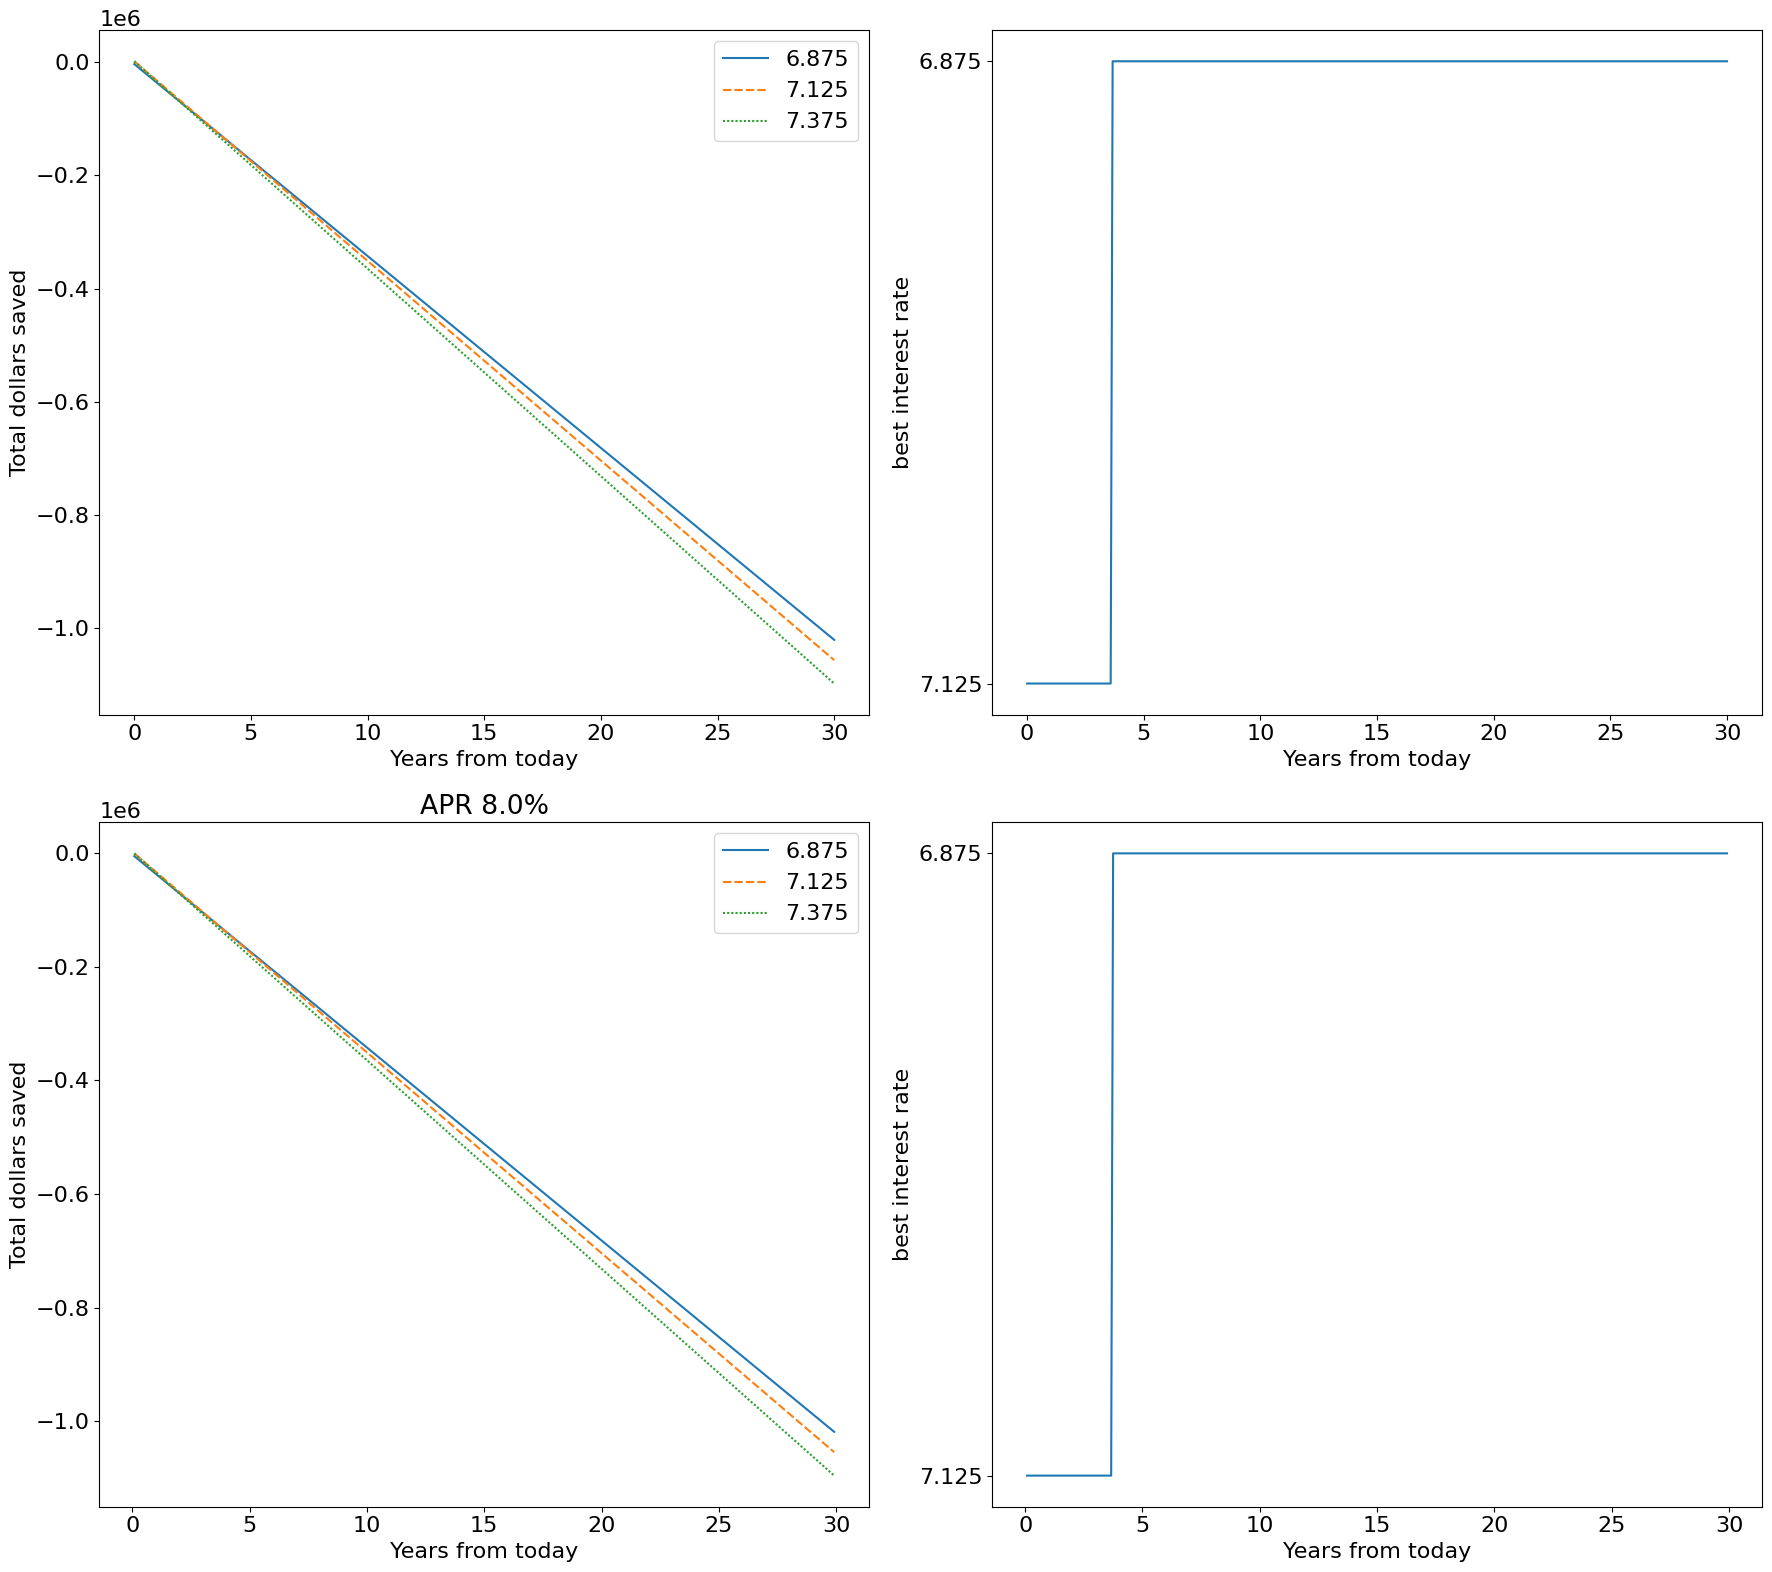

In [28]:
plt.figure(figsize=(18,16))
plt.rcParams.update({'font.size':16})
plt.subplot(2,2,1)
sns.lineplot(data=benefit_flat_df)
plt.xlabel('Years from today'), plt.ylabel('Total dollars saved') 

plt.subplot(2,2,2)
plt.plot(benefit_flat_df.idxmax(axis=1))
plt.xlabel('Years from today'), plt.ylabel('best interest rate') 

plt.subplot(2,2,3)
sns.lineplot(data=benefit_grow_df)
plt.xlabel('Years from today'), plt.ylabel('Total dollars saved') 
plt.title('APR ' + str(apr*100) + '%')

plt.subplot(2,2,4)
plt.plot(benefit_grow_df.idxmax(axis=1))
plt.xlabel('Years from today'), plt.ylabel('best interest rate') 
plt.tight_layout()
plt.show()